## SVM

In [1]:
import pickle
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn import metrics

In [2]:
with open('tf_vec1211.pkl', 'rb') as fp:
    tf_vec = pickle.load(fp)

In [3]:
def load_data(path):
    data = pd.read_csv(path)
    return data['reviewText'].tolist(), data['sentiment'].tolist()

In [4]:
# Load data
train_x, train_y = load_data('data/pptrain.csv')
test_x, test_y = load_data('data/pptest.csv')

In [5]:
len(train_x)

25000

In [6]:
# Convert text to vectors
train_features = tf_vec.transform(train_x)
test_features = tf_vec.transform(test_x)

In [7]:
svm_model = LinearSVC()
svm_model.fit(train_features, train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
pred = svm_model.predict(test_features)

In [9]:
accuracy = metrics.accuracy_score(pred,test_y)
print(accuracy)

0.86596


In [10]:
print(metrics.classification_report(y_true=test_y, y_pred=pred))

              precision    recall  f1-score   support

         neg       0.87      0.87      0.87     12500
         pos       0.87      0.87      0.87     12500

   micro avg       0.87      0.87      0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000




decision_function(X)	Distance of the samples X to the separating hyperplane.

In [13]:
y_score = svm_model.decision_function(test_features)

In [34]:
y_train_bin = [1 if y == 'pos' else 0 for y in train_y]

In [35]:
y_test_bin = [1 if y == 'pos' else 0 for y in test_y]

In [15]:
precision, recall, _ = metrics.precision_recall_curve(y_test_bin, y_score)

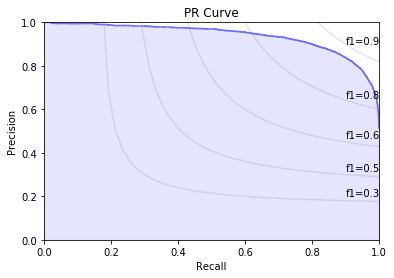

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Draw PR Curve
plt.step(recall, precision, color='b', alpha=0.5, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.1, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')

# Add F-score to the plot as well
f_scores = np.linspace(0.3, 0.9, num=5)
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

# Set the limit of the figure
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.show()
plt.savefig("PRCurve_SVM", dpi=300)

In [22]:
# save model
import pickle
with open('svm_model1211.pkl', 'wb') as pkl_file:
    pickle.dump(svm_model, pkl_file)

## Logistic Regression

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$

### Forward Propagation

- Calculate $A = \hat{Y} = \sigma(w^T X + b)$
- Calculate `cost`: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

### Back Propagation:

- Calculate grad `dw`: $\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$
- Calculate grad `db`: $\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$

In [24]:
from ml_utils import *
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def propagate(w, b, X, Y):
    
    # Get number of training examples
    m = X.shape[1]
    
    # Get activation
    A = sigmoid(np.dot(w.T, X) + b)
    
    # Compute cost
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    # Compute grad
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [26]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        
        # Forward & Backward prop
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']

        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
        
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}
    
    return params, grads, costs

In [53]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver="lbfgs")

In [55]:
log_model.fit(train_features, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
pred_logd = log_model.predict(test_features)

In [57]:
accuracy_log = metrics.accuracy_score(pred_log,test_y)
print(accuracy_log)

0.87756


In [58]:
# save model
import pickle
with open('lr_model1211.pkl', 'wb') as pkl_file:
    pickle.dump(log_model, pkl_file)